# Deutsch Algorithm

## Background

To run Deutsch's algorithm, we require an oracle that implements a function—either constant or balanced—and a circuit to evaluate it. Here, we demonstrate how to construct such oracles and use gates from the Qiskit Circuit Library to build Deutsch's circuit. The `Sampler` primitive in Qiskit Runtime allows for seamless execution of the circuit.

**Note:** The estimated runtime is approximately 4 seconds; actual runtimes may vary depending on backend load and network conditions.


## Requirements

Before starting this tutorial, ensure that the following dependencies are installed:

- Qiskit SDK 1.0 or later with visualization support:
  ```bash
  pip install 'qiskit[visualization]'

## Setup

We begin by importing the essential Python modules and Qiskit components required for this demonstration.

In [117]:
#Built-in modules
import math

#imports from Qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_distribution, plot_histogram
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager


#Imports from Qiskit Primitives
from qiskit_ibm_runtime import SamplerV2 as Sampler

#Imports from Qiskit Runtime
from qiskit_ibm_runtime import QiskitRuntimeService

In [118]:
# To run on hardware, select the backend with the fewest number of jobs in the queue
backend = AerSimulator()  # Use AerSimulator for local simulation

# To run on IBM Quantum hardware, uncomment the following lines
# service = QiskitRuntimeService(channel="ibm_cloud")
# Rbackend = service.least_busy(operational=True, simulator=False)
# backend.name

## Step 1: Map classical inputs to a quantum problem

There are four possibilities for the oracles in Deutsch's algorithm, where the oracle implements a function \( f: \{0,1\} \rightarrow \{0,1\} \). The function can be either constant (\( f_1 \) or \( f_2 \)) or balanced (\( f_3 \) or \( f_4 \)), as given in **Table 1**. The code for creating the Deutsch circuit is as follows:


In [119]:
def deutsch_circuit(oracle):
    # Create a Quantum Circuit
    qubits=QuantumRegister(2,name="q")
    cbits=ClassicalRegister(1,name="c")
    circuit = QuantumCircuit(qubits,cbits)

    circuit.h(0)
    circuit.x(1)
    circuit.h(1)
    circuit.append(oracle,qubits)
    circuit.h(0)
    circuit.measure(0,0)

    return circuit

def oracle(value):
    # Create a Quantum Circuit for the oracle
    oracle = QuantumCircuit(2,name="oracle")
    
    if(value==1):
        pass
    elif(value==2):
        oracle.x(1)
    elif(value==3):
        oracle.cx(0,1)
    elif(value==4):
        oracle.cx(0,1)
        oracle.x(1)
    return oracle

We can create the Deutsch circuit using the following code.

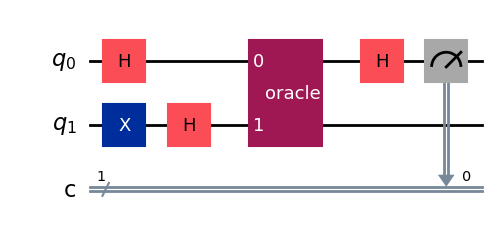

In [120]:
qc_1=deutsch_circuit(oracle(1))
qc_1.draw("mpl")

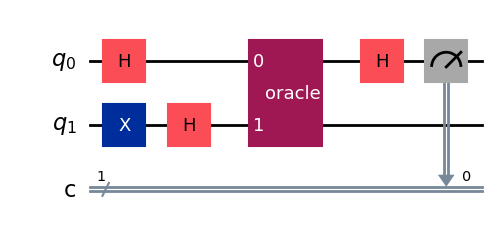

In [121]:
qc_2=deutsch_circuit(oracle(2))
qc_2.draw("mpl")

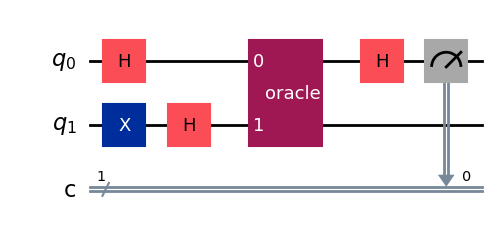

In [122]:
qc_3=deutsch_circuit(oracle(3))
qc_3.draw("mpl")

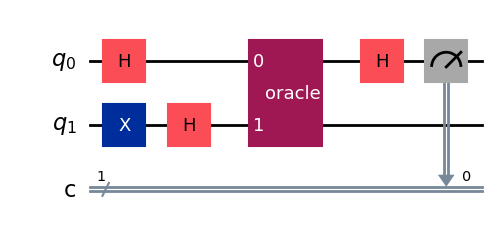

In [123]:
qc_4=deutsch_circuit(oracle(4))
qc_4.draw("mpl")

## Step 2: Optimize problem for quantum execution

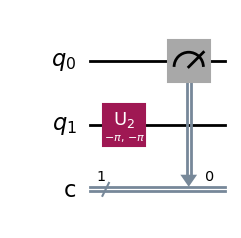

In [124]:
target=backend.target
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)

circuit_isa_1=pm.run(qc_1)
circuit_isa_1.draw(output="mpl")

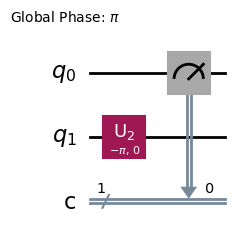

In [125]:
target=backend.target
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)

circuit_isa_2=pm.run(qc_2)
circuit_isa_2.draw(output="mpl")

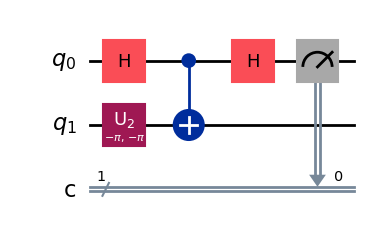

In [126]:
target=backend.target
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)

circuit_isa_3=pm.run(qc_3)
circuit_isa_3.draw(output="mpl")

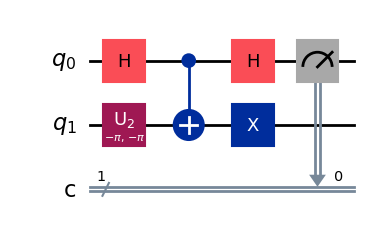

In [127]:
target=backend.target
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)

circuit_isa_4=pm.run(qc_4)
circuit_isa_4.draw(output="mpl")

## Step 3: Execute using Qiskit Primitives

We are now required to run the circuit and sample the measurements on th first qubit thus for execution we will use the Sampler runtime primitive.

In [128]:
sampler=Sampler(mode=backend)
sampler.options.default_shots=10_000
result_1 = sampler.run([circuit_isa_1]).result()
dist_1 = result_1[0].data.c.get_counts()

In [129]:
sampler=Sampler(mode=backend)
sampler.options.default_shots=10_000
result_2 = sampler.run([circuit_isa_2]).result()
dist_2 = result_2[0].data.c.get_counts()

In [130]:
sampler=Sampler(mode=backend)
sampler.options.default_shots=10_000
result_3 = sampler.run([circuit_isa_3]).result()
dist_3 = result_3[0].data.c.get_counts()

In [131]:
sampler=Sampler(mode=backend)
sampler.options.default_shots=10_000
result_4 = sampler.run([circuit_isa_4]).result()
dist_4 = result_4[0].data.c.get_counts()

## Step 4: Post-Process, reutrn result in Classical format

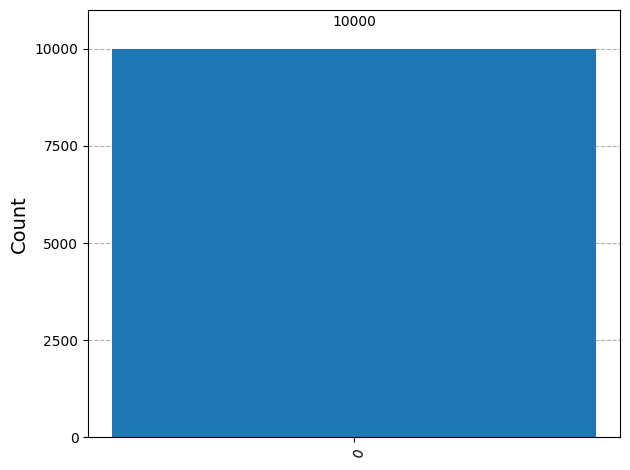

In [132]:
plot_histogram(dist_1, filename="../MyNotes/Quantum_Computing/Images/deutsch_result_f1.png")
plot_histogram(dist_1)

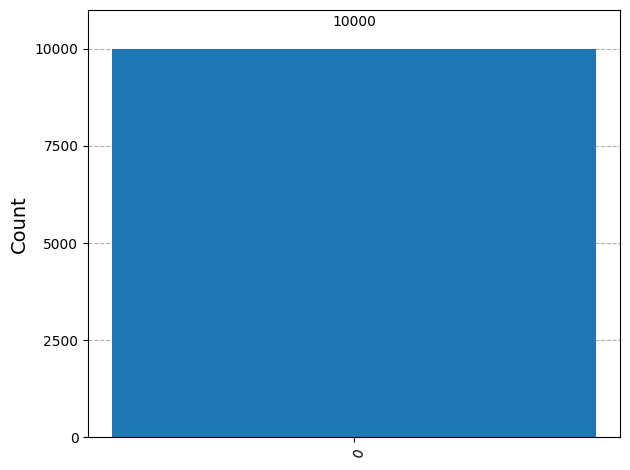

In [133]:
plot_histogram(dist_2, filename="../MyNotes/Quantum_Computing/Images/deutsch_result_f2.png")
plot_histogram(dist_2)

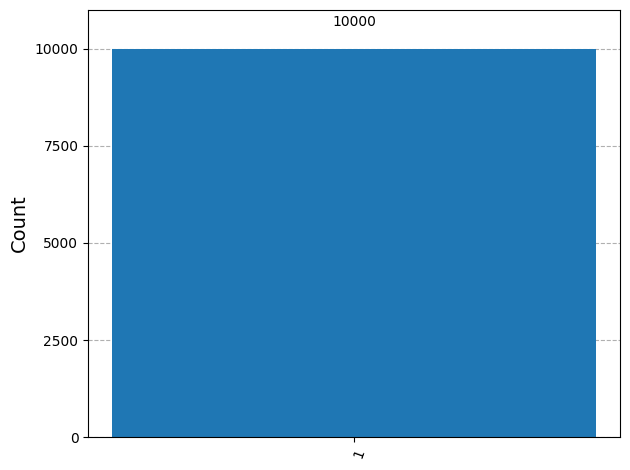

In [134]:
plot_histogram(dist_3, filename="../MyNotes/Quantum_Computing/Images/deutsch_result_f3.png")
plot_histogram(dist_3)

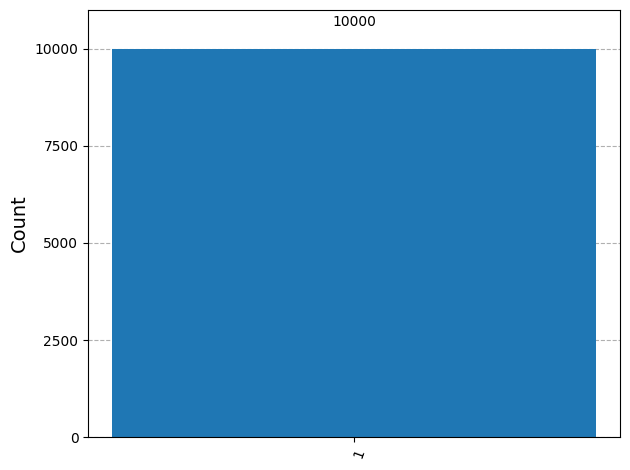

In [135]:
plot_histogram(dist_4, filename="../MyNotes/Quantum_Computing/Images/deutsch_result_f4.png")
plot_histogram(dist_4)

### Results

In [136]:
max_key = max(dist_1, key=dist_1.get)
if max_key == '0':
    print("The function is constant.")
else:
    print("The function is balanced.")

The function is constant.


In [137]:
max_key = max(dist_2, key=dist_2.get)
if max_key == '0':
    print("The function is constant.")
else:
    print("The function is balanced.")

The function is constant.


In [138]:
max_key = max(dist_3, key=dist_3.get)
if max_key == '0':
    print("The function is constant.")
else:
    print("The function is balanced.")

The function is balanced.


In [139]:
max_key = max(dist_4, key=dist_4.get)
if max_key == '0':
    print("The function is constant.")
else:
    print("The function is balanced.")

The function is balanced.


# Deutsch-Josza Algorithm

## Background
Usage estimate: 4 seconds on ibm\_brisbane(NOTE; This is an estimate only. Your runtime may vary)

In order to run Deutsch-Jozsa algorithm requires an oracle that implements the function either constant or balanced and Deutsch-Jozsa Circuit.

Here, we demonstrate how to construct Deutsch-Josza oracles and use the gates from the Qiskit circuit library to easily set up a Deutsch-Jozsa Circuit. The runtime \textit{Sampler} primitive allows seamless execution of Deutsch=Jozsa circuit.

### Requirements
Before starting this tutorial, ensure that you have the following installed:
- Qiskit SDK 1.0 or later, with visualization support (pip install 'qiskit[visualization]')
- Qiskit Runtime (pip install qiskit-ibm-runtime) 0.22 or later

## Setup
Here we import the small number of tools we need for this tutorial

In [140]:
#Built-in modules
import numpy as np
from typing import Dict

#imports from Qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

#Imports from Qiskit Primitives
from qiskit_ibm_runtime import SamplerV2 as Sampler

#Imports from Qiskit Runtime
from qiskit_ibm_runtime import QiskitRuntimeService

In [141]:
# To run on hardware, select the backend with the fewest number of jobs in the queue
backend = AerSimulator()  # Use AerSimulator for local simulation

# To run on IBM Quantum hardware, uncomment the following lines
# service = QiskitRuntimeService(channel="ibm_cloud")
# backend = service.least_busy(operational=True, simulator=False)
# backend.name

## Step 1: Map classical inputs to a quantum problem

Deutsch-Jozsa algorithm requires an oracle that implements the function either constant or balanced. Here, we demonstrate how to construct Deutsch-Jozsa oracles and use the gates from the Qiskit circuit library to easily set up a Deutsch-Jozsa Circuit. Here, we will work the  with 2 qubits for constant and balanced functions and verify the results as expected.

The runtime Sampler primitive allows seamless execution of Deutsch circuit.

In [142]:
def build_oracle(f_dict: Dict[str, str]) -> QuantumCircuit:
    """
    Builds a classical reversible oracle U_f: |x⟩|y⟩ ↦ |x⟩|y ⊕ f(x)⟩
    
    Args:
        f_dict (Dict[str, str]): Mapping from binary strings to binary strings.
        
    Returns:
        QuantumCircuit: The oracle circuit.
    """

    def bitstring_to_bitlist(s: str) -> list[int]:
        return [int(b) for b in s]

    # Determine input/output width
    n_in = len(next(iter(f_dict)))
    n_out = len(next(iter(f_dict.values())))

    # Registers
    q_in = QuantumRegister(n_in, name='q_in')
    q_out = QuantumRegister(n_out, name='q_out')
    oracle = QuantumCircuit(q_in, q_out, name='Oracle')

    # Construct the oracle
    for x_str, f_str in f_dict.items():
        x_bits = bitstring_to_bitlist(x_str)
        f_bits = bitstring_to_bitlist(f_str)

        # Apply X to invert controls where bit is 0
        for i, bit in enumerate(x_bits):
            if bit == 0:
                oracle.x(q_in[i])

        # Apply MCX to encode f(x) as y ⊕ f(x)
        for j, fbit in enumerate(f_bits):
            if fbit == 1:
                oracle.mcx(q_in[:], q_out[j])

        # Uncompute the control X gates
        for i, bit in enumerate(x_bits):
            if bit == 0:
                oracle.x(q_in[i])

    return oracle

def deutsch_jozsa(oracle):
    # Create a Quantum Circuit
    qubits=QuantumRegister(oracle.num_qubits,name="q")
    cbits=ClassicalRegister(oracle.num_qubits-1,name="c")
    circuit=QuantumCircuit(qubits,cbits)

    circuit.x(qubits[-1])
    circuit.h(qubits)
    circuit.append(oracle, qubits)     
    circuit.h(qubits)
    circuit.measure(qubits[:-1],cbits)
    circuit.name = 'Deutsch-Jozsa Algorithm Circuit'
    
    return circuit

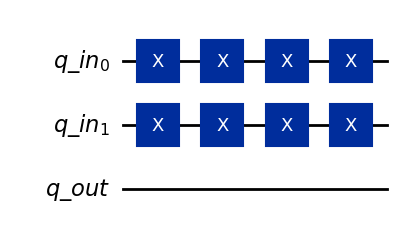

In [143]:
f_const_0 = {
    '00': '0',
    '01': '0',
    '10': '0',
    '11': '0'
}
oracle = build_oracle(f_const_0)
oracle.draw('mpl')

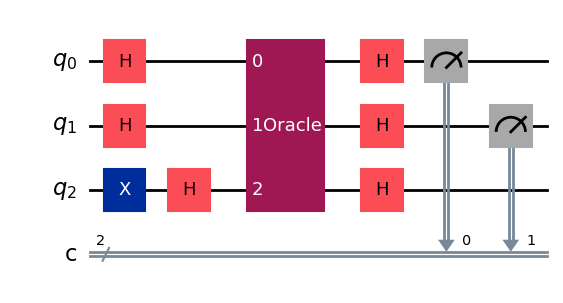

In [144]:
qc_const_0=deutsch_jozsa(build_oracle(f_const_0))
qc_const_0.draw('mpl')
qc_const_0.draw("mpl", filename="../MyNotes/Quantum_Computing/Images/deutsch_const_0.png")

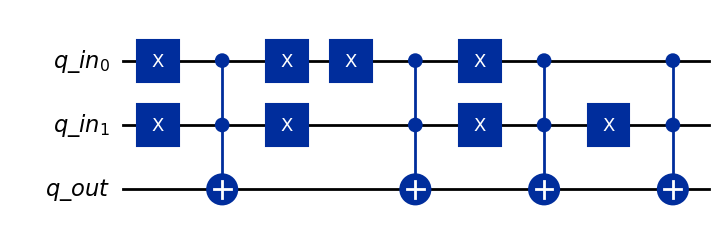

In [145]:
f_const_1 = {
    '00': '1',
    '01': '1',
    '10': '1',
    '11': '1'
}
oracle = build_oracle(f_const_1)
oracle.draw('mpl')

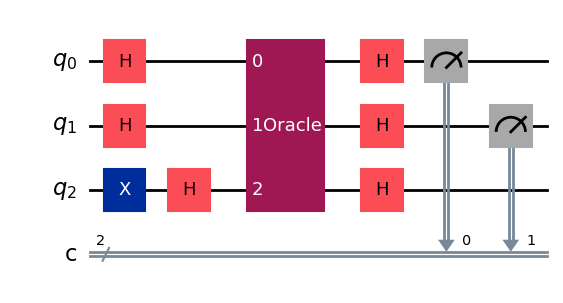

In [146]:
qc_const_1=deutsch_jozsa(build_oracle(f_const_1))
qc_const_1.draw('mpl')
qc_const_1.draw("mpl", filename="../MyNotes/Quantum_Computing/Images/deutsch_const_1.png")

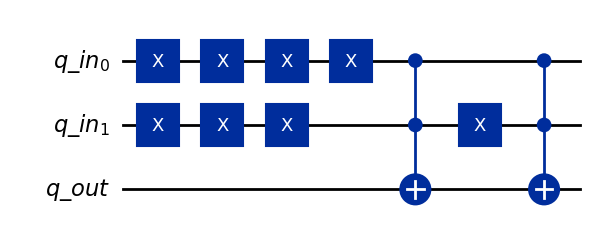

In [147]:
f_bal_0 = {
    '00': '0',
    '01': '0',
    '10': '1',
    '11': '1'
}
oracle = build_oracle(f_bal_0)
oracle.draw('mpl')

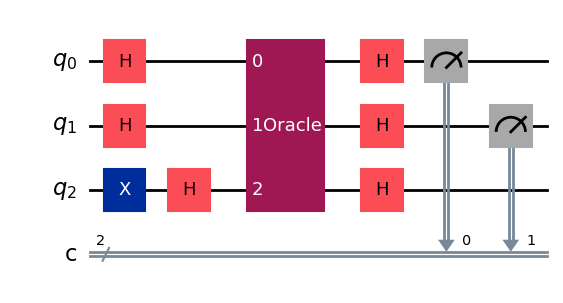

In [148]:
qc_bal_0=deutsch_jozsa(build_oracle(f_bal_0))
qc_bal_0.draw('mpl')

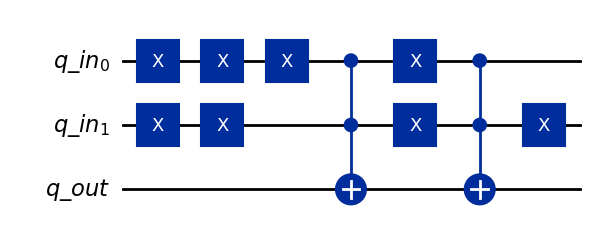

In [149]:
f_bal_1 = {
    '00': '0',
    '01': '1',
    '10': '1',
    '11': '0'
}
oracle = build_oracle(f_bal_1)
oracle.draw('mpl')

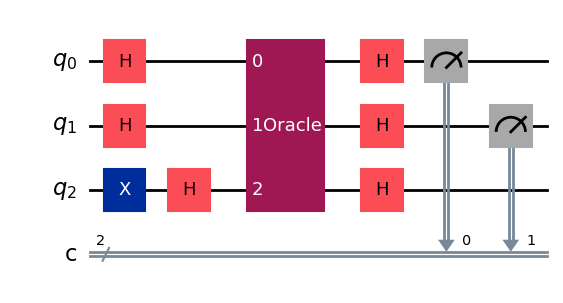

In [150]:
qc_bal_1=deutsch_jozsa(build_oracle(f_bal_1))
qc_bal_1.draw('mpl')

## Step 2: Optimize problem for quantum execution

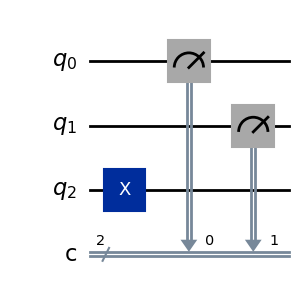

In [151]:
target=backend.target
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)

circuit_isa_const_0=pm.run(qc_const_0)
circuit_isa_const_0.draw(output="mpl",idle_wires=False,style="iqp", filename="../MyNotes/Quantum_Computing/Images/deutsch_const_opt_0.png")

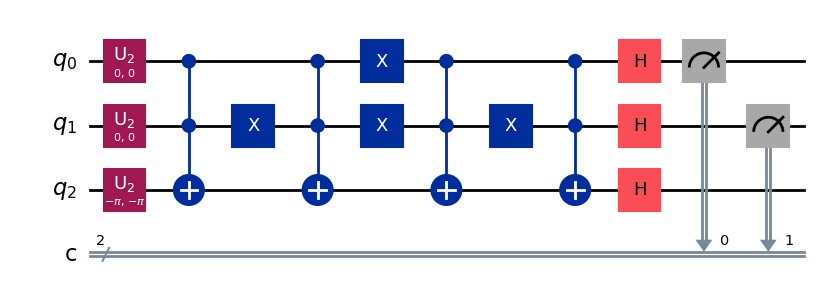

In [152]:
target=backend.target
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)

circuit_isa_const_1=pm.run(qc_const_1)
circuit_isa_const_1.draw(output="mpl",idle_wires=False,style="iqp", filename="../MyNotes/Quantum_Computing/Images/deutsch_const_opt_1.png")

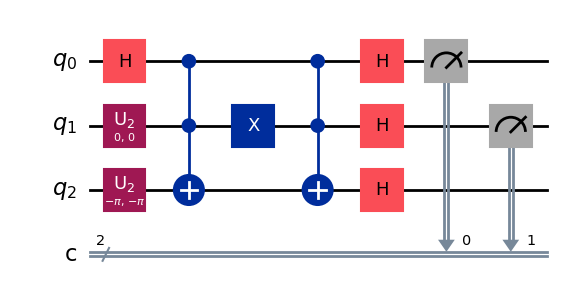

In [153]:
target=backend.target
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)

circuit_isa_bal_0=pm.run(qc_bal_0)
circuit_isa_bal_0.draw(output="mpl",idle_wires=False,style="iqp",filename="../MyNotes/Quantum_Computing/Images/deutsch_isa_bal_0.png")

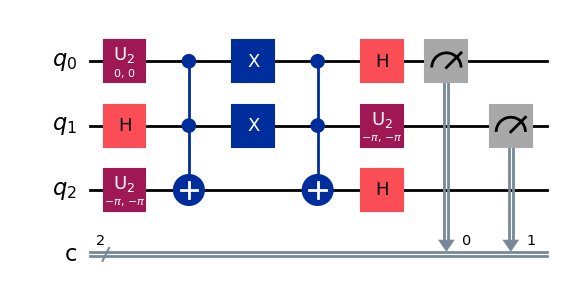

In [154]:
target=backend.target
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)

circuit_isa_bal_1=pm.run(qc_bal_1)
circuit_isa_bal_1.draw(output="mpl",idle_wires=False,style="iqp",filename="../MyNotes/Quantum_Computing/Images/deutsch_isa_bal_1.png")

## Step 3: Execute using Qiskit Primitives

We are now required to run the circuit and sample the measurements on th first qubit thus for execution we will use the Sampler runtime primitive.

In [155]:
sampler=Sampler(mode=backend)
sampler.options.default_shots=10_000
result_const_0 = sampler.run([circuit_isa_const_0]).result()
dist_const_0 = result_const_0[0].data.c.get_counts()

In [156]:
sampler=Sampler(mode=backend)
sampler.options.default_shots=10_000
result_const_1 = sampler.run([circuit_isa_const_1]).result()
dist_const_1 = result_const_1[0].data.c.get_counts()

In [157]:
sampler=Sampler(mode=backend)
sampler.options.default_shots=10_000
result_bal_0 = sampler.run([circuit_isa_bal_0]).result()
dist_bal_0 = result_bal_0[0].data.c.get_counts()

In [158]:
sampler=Sampler(mode=backend)
sampler.options.default_shots=10_000
result_bal_1 = sampler.run([circuit_isa_bal_1]).result()
dist_bal_1 = result_bal_1[0].data.c.get_counts()

## Step 4: Post-Process, reutrn result in Classical format

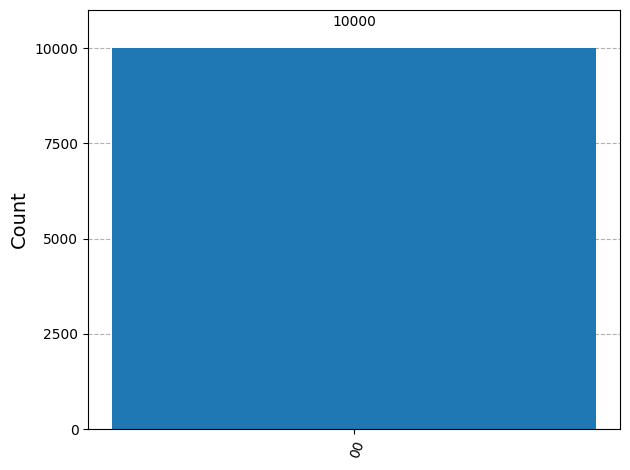

In [159]:
plot_histogram(dist_const_0, filename="../MyNotes/Quantum_Computing/Images/deutsch_const_0results.png")
plot_histogram(dist_const_0)

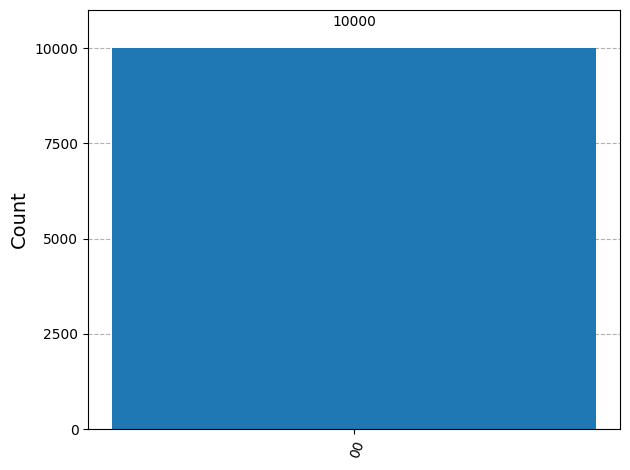

In [160]:
plot_histogram(dist_const_1, filename="../MyNotes/Quantum_Computing/Images/deutsch_jozsa_const_1results.png")
plot_histogram(dist_const_1)

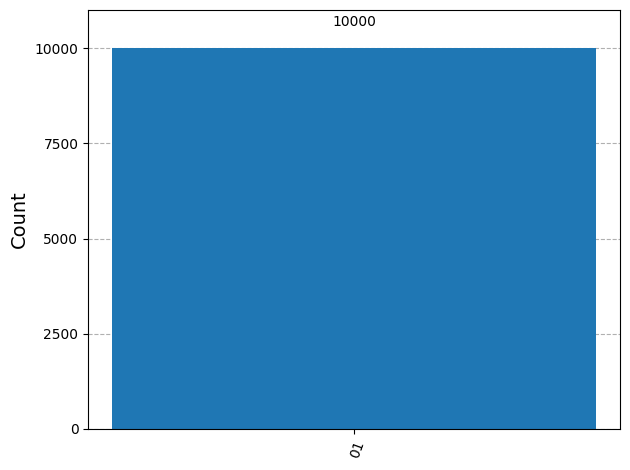

In [161]:
plot_histogram(dist_bal_0, filename="../MyNotes/Quantum_Computing/Images/deutsch_jozsa_bal_0result.png")
plot_histogram(dist_bal_0)

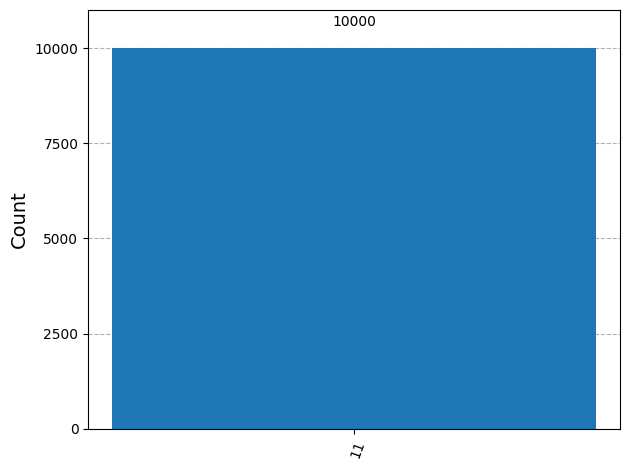

In [162]:
plot_histogram(dist_bal_1, filename="../MyNotes/Quantum_Computing/Images/deutsch_jozsa_bal_1result.png")
plot_histogram(dist_bal_1)